# 第6章 k平均法：教師なし学習モデルの基礎

## 「06-k_means.py」の解説

ITエンジニアための機械学習理論入門「第6章 k平均法:教師なし学習モデルの基礎」で使用しているサンプルコード「06-k_means.py」の解説です。

※ 解説用にコードの内容は少し変更しています。

はじめに必要なモジュールをインポートしておきます。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

画像ファイル「photo.jpg」が用意されていることを確認します。

In [2]:
ls -l photo.jpg

-rw-r--r-- 1 root root 47187 Aug 10 06:25 photo.jpg


画像ファイル「photo.jpg」を読み込みます。

In [3]:
im = Image.open("photo.jpg")    

画像を表示してみます。白、赤、緑の３色を中心に構成された画像です。

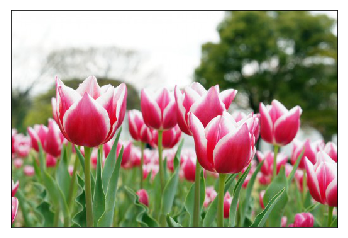

In [4]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

画像データを各ピクセルの (R,G,B) を並べたリストに変換します。

In [5]:
pixels = list(im.convert('RGB').getdata())    

リストの先頭部分を確認すると、次のようになります。

In [6]:
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

このリストから、k平均法で「代表色」を決定する関数を用意します。

k個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [7]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print( "Initial centers:", )
    print( map(lambda x: x.tolist(), center) )
    print( "========================" )
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] // num_points[i]
        center = center_new
        print( map(lambda x: x.tolist(), center) )
        print( "Distortion: J=%d" % distortion_new )

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
        
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))

    print( "Done." )
    return new_pixels

例として、2つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 2)

Initial centers:
Distortion: J=4555178790
Distortion: J=917215161
Distortion: J=900960981
Distortion: J=899382617
Distortion: J=899089043
Done.


結果を画像として表示します。

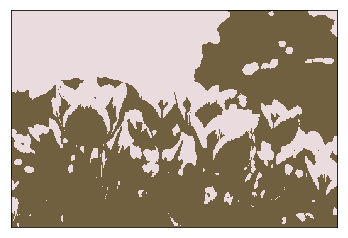

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

同様に3つのクラスターに分類します。

In [10]:
result = run_kmeans(pixels, 3)

Initial centers:
Distortion: J=5916165925
Distortion: J=1649992427
Distortion: J=940006870
Distortion: J=721409146
Distortion: J=662470426
Distortion: J=634659964
Distortion: J=618203791
Distortion: J=606641914
Distortion: J=598169007
Distortion: J=592576577
Distortion: J=588385913
Distortion: J=585568737
Distortion: J=583510384
Distortion: J=582083556
Distortion: J=580879480
Distortion: J=579645065
Distortion: J=578913979
Distortion: J=578300197
Distortion: J=577948648
Done.


結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

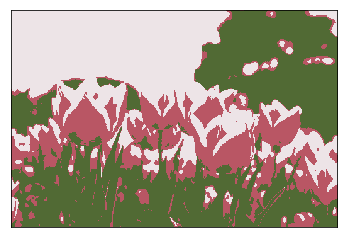

In [11]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

最後に、8つのクラスターに分類して、結果を画像として表示してみます。

In [12]:
result = run_kmeans(pixels, 8)

Initial centers:
Distortion: J=1165314987
Distortion: J=271327886
Distortion: J=181127978
Distortion: J=166700386
Distortion: J=160711811
Distortion: J=155048566
Distortion: J=151045099
Distortion: J=148850165
Distortion: J=147679065
Distortion: J=146882620
Distortion: J=146252540
Distortion: J=145788119
Distortion: J=145380202
Distortion: J=145086952
Distortion: J=144707357
Distortion: J=144370127
Distortion: J=144044916
Distortion: J=143763355
Distortion: J=143456079
Distortion: J=143212118
Distortion: J=142917338
Distortion: J=142750531
Distortion: J=142575135
Distortion: J=142399479
Distortion: J=142188934
Distortion: J=142085687
Done.


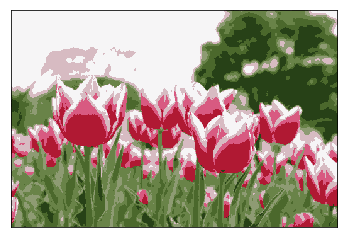

In [13]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

インターネットから好きな画像をダウンロードして試すこともできます。ここでは、無償利用可能なフリー素材をダウンロードしてみます。

In [14]:
!curl -OL http://2.bp.blogspot.com/-4SSFZUa0ab4/Vg57ivCMfhI/AAAAAAAAyzQ/Pm4eBFxAaOc/s800/sweets_fruit_pafe.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  308k  100  308k    0     0   424k      0 --:--:-- --:--:-- --:--:--  424k


ダウンロードしたファイルを確認します。

In [15]:
!ls *.png

sweets_fruit_pafe.png


ファイルを読み込んで表示します。

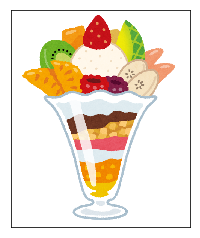

In [16]:
im = Image.open("sweets_fruit_pafe.png")
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

RBG形式のデータに変換して、5つのクラスターに分類します。背景の透明色部分は、黒色に変換される点に注意してください。

In [17]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers:
Distortion: J=24881616225
Distortion: J=2280049998
Distortion: J=890345894
Distortion: J=780801849
Distortion: J=714690661
Distortion: J=689518282
Distortion: J=687484151
Distortion: J=687069573
Done.


結果を表示して確認します。

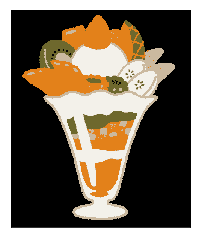

In [18]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)